
## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Objective
 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house.
 - The optimal value of lambda for ridge and lasso regression.

 

### Business Goal 
- Model the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- The model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset
pd.set_option('display.max_columns', None)

prices = pd.read_csv("train.csv")
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Id is just an unique identifier, we can drop it
print(prices.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Summary of the dataset: 1460 Rows and 81 Columns. 
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Calculate the percentage of null values 
na_percentage = prices.isnull().mean() * 100
na_percentage.sort_values(ascending=False)
print(na_percentage[na_percentage>0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


### There are NA values present in the dataset, but we need to check the interpretation of the same from data dictionary
 
#### NA interpretation from Data Dictionary
##### Categorical

In the following categorical values, NA refers to the Non Availability of the feature
1. **Alley** 
2. **FireplaceQu**
3. **PoolQC** 
4. **Fence**
5. **MiscFeature**
6. **GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond**
7. **MasVnrType**
8. **BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2**
9. **Electrical**


##### Numerical
10. **LotFrontage** :  As this is continous data, thus we can replace it with mean value later
11. **MasVnrArea** : As this is continous data, thus we can replace it with mean value later

In [57]:
#Convert the Categorical Columns with NA values so that it is not considered as Null by the pandas Library

columns_with_na = [ 'Alley', 'MasVnrType', 'BsmtQual', 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
    'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Replace NaN values in specified columns with 'Not Available', which means the features are not available
# for column in columns_with_na:
#     prices[column].fillna(f'{column}_None', inplace=True)

for column in columns_with_na:
    t=''
    t = column + '_None'
    prices[column].fillna(t, inplace=True)



In [7]:
print(prices)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street       Alley  \
0        1          60       RL         65.0     8450   Pave  Alley_None   
1        2          20       RL         80.0     9600   Pave  Alley_None   
2        3          60       RL         68.0    11250   Pave  Alley_None   
3        4          70       RL         60.0     9550   Pave  Alley_None   
4        5          60       RL         84.0    14260   Pave  Alley_None   
...    ...         ...      ...          ...      ...    ...         ...   
1455  1456          60       RL         62.0     7917   Pave  Alley_None   
1456  1457          20       RL         85.0    13175   Pave  Alley_None   
1457  1458          70       RL         66.0     9042   Pave  Alley_None   
1458  1459          20       RL         68.0     9717   Pave  Alley_None   
1459  1460          20       RL         75.0     9937   Pave  Alley_None   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg  

In [8]:
#Let's convert the value 

In [58]:
unique_counts = prices.nunique()
unique_counts_df = pd.DataFrame({'Column': unique_counts.index, 'Unique_Count': unique_counts.values})
transposed_df = unique_counts_df.T
transposed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
Column,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Unique_Count,1460,15,5,111,1073,2,3,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,5,328,4,5,6,5,5,5,7,637,7,144,780,721,6,5,2,6,753,417,24,861,4,3,4,3,8,4,4,12,7,4,6,7,98,4,5,441,6,6,3,274,202,120,20,76,8,4,5,5,21,12,5,9,6,663


In [10]:
# Summary of the dataset: 1460 Rows and 81 Columns. 
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Convert Columns to Dtype category which are mentioned as Dtype int64 but is a categorical variable.
prices[['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YrSold','MoSold']] = prices[['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','YrSold','MoSold']].astype('category')

## Convert two columns to 'numeric' type as mentioned above
prices['LotFrontage'] = pd.to_numeric(prices['LotFrontage'], errors='coerce')
prices['MasVnrArea'] = pd.to_numeric(prices['MasVnrArea'], errors='coerce')

In [12]:
## Once Data type is corrected! Let's convert all the object types to Category type.

prices[prices.select_dtypes(['object']).columns] = prices.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

In [59]:
#Let's divide the Columns into Categorical and Numerical Values
# Get columns with 'category' data type

cat_vars = list(prices.select_dtypes(['category']).columns)
# Get columns with numeric data types (int64 and float)
num_vars = list(prices.select_dtypes(['int64', 'float64']).columns)

# Display the list
print("Categorical Columns:\n", cat_vars ,len(cat_vars),"\n")
print("Numerical Columns:\n", num_vars ,len(num_vars),"\n")

#Check if all the columns are covered in this or not
print("Columns Left: ",len(prices.columns)-len(cat_vars) - len(num_vars))

Categorical Columns:
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] 58 

Numerical Columns:
 ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQu

In [14]:
#Get basic idea of data using describe()
prices.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


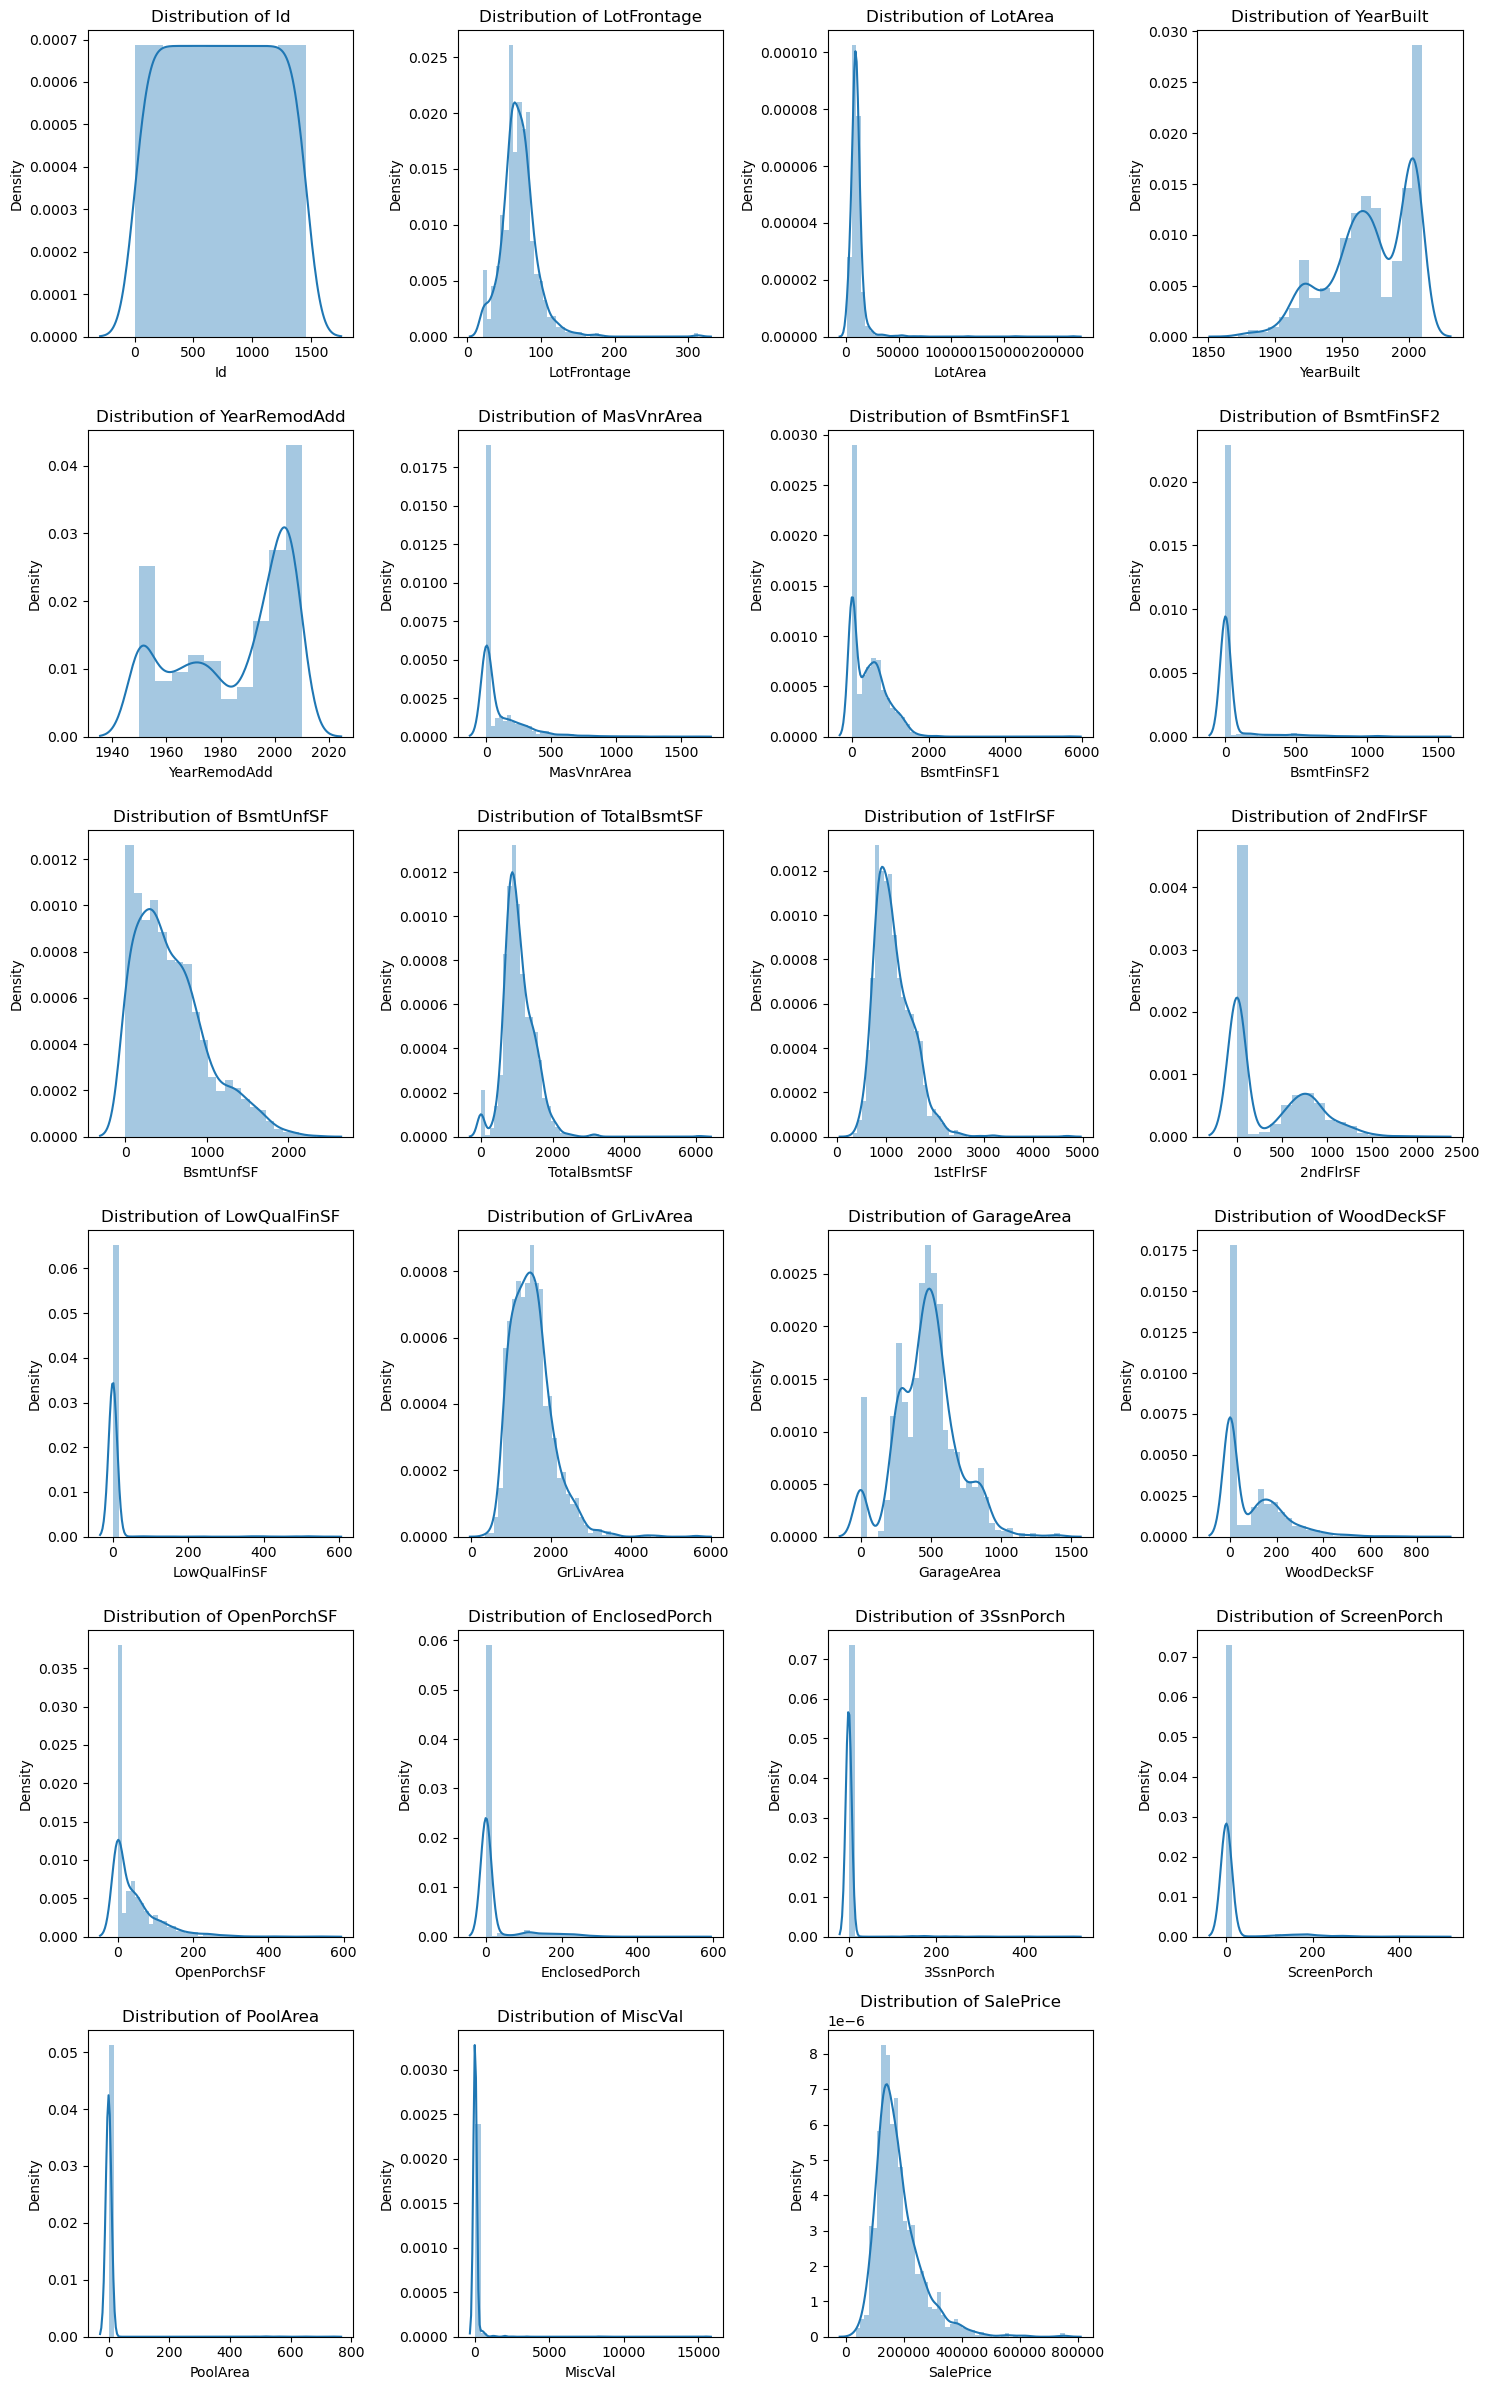

In [15]:


import math
num_plots = len(num_vars)
num_cols = 4  # Fixed number of columns per row

# Calculate the number of required rows based on the number of columns
num_rows_required = math.ceil(num_plots / num_cols)

# Adjust the number of rows dynamically
num_rows = max(num_rows_required, 1)  # Ensure at least one row

# Create a new figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Flatten the 2D array of subplots to iterate over them
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.distplot(prices[var], ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
# Remove any empty subplots if there are more subplots than variables
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


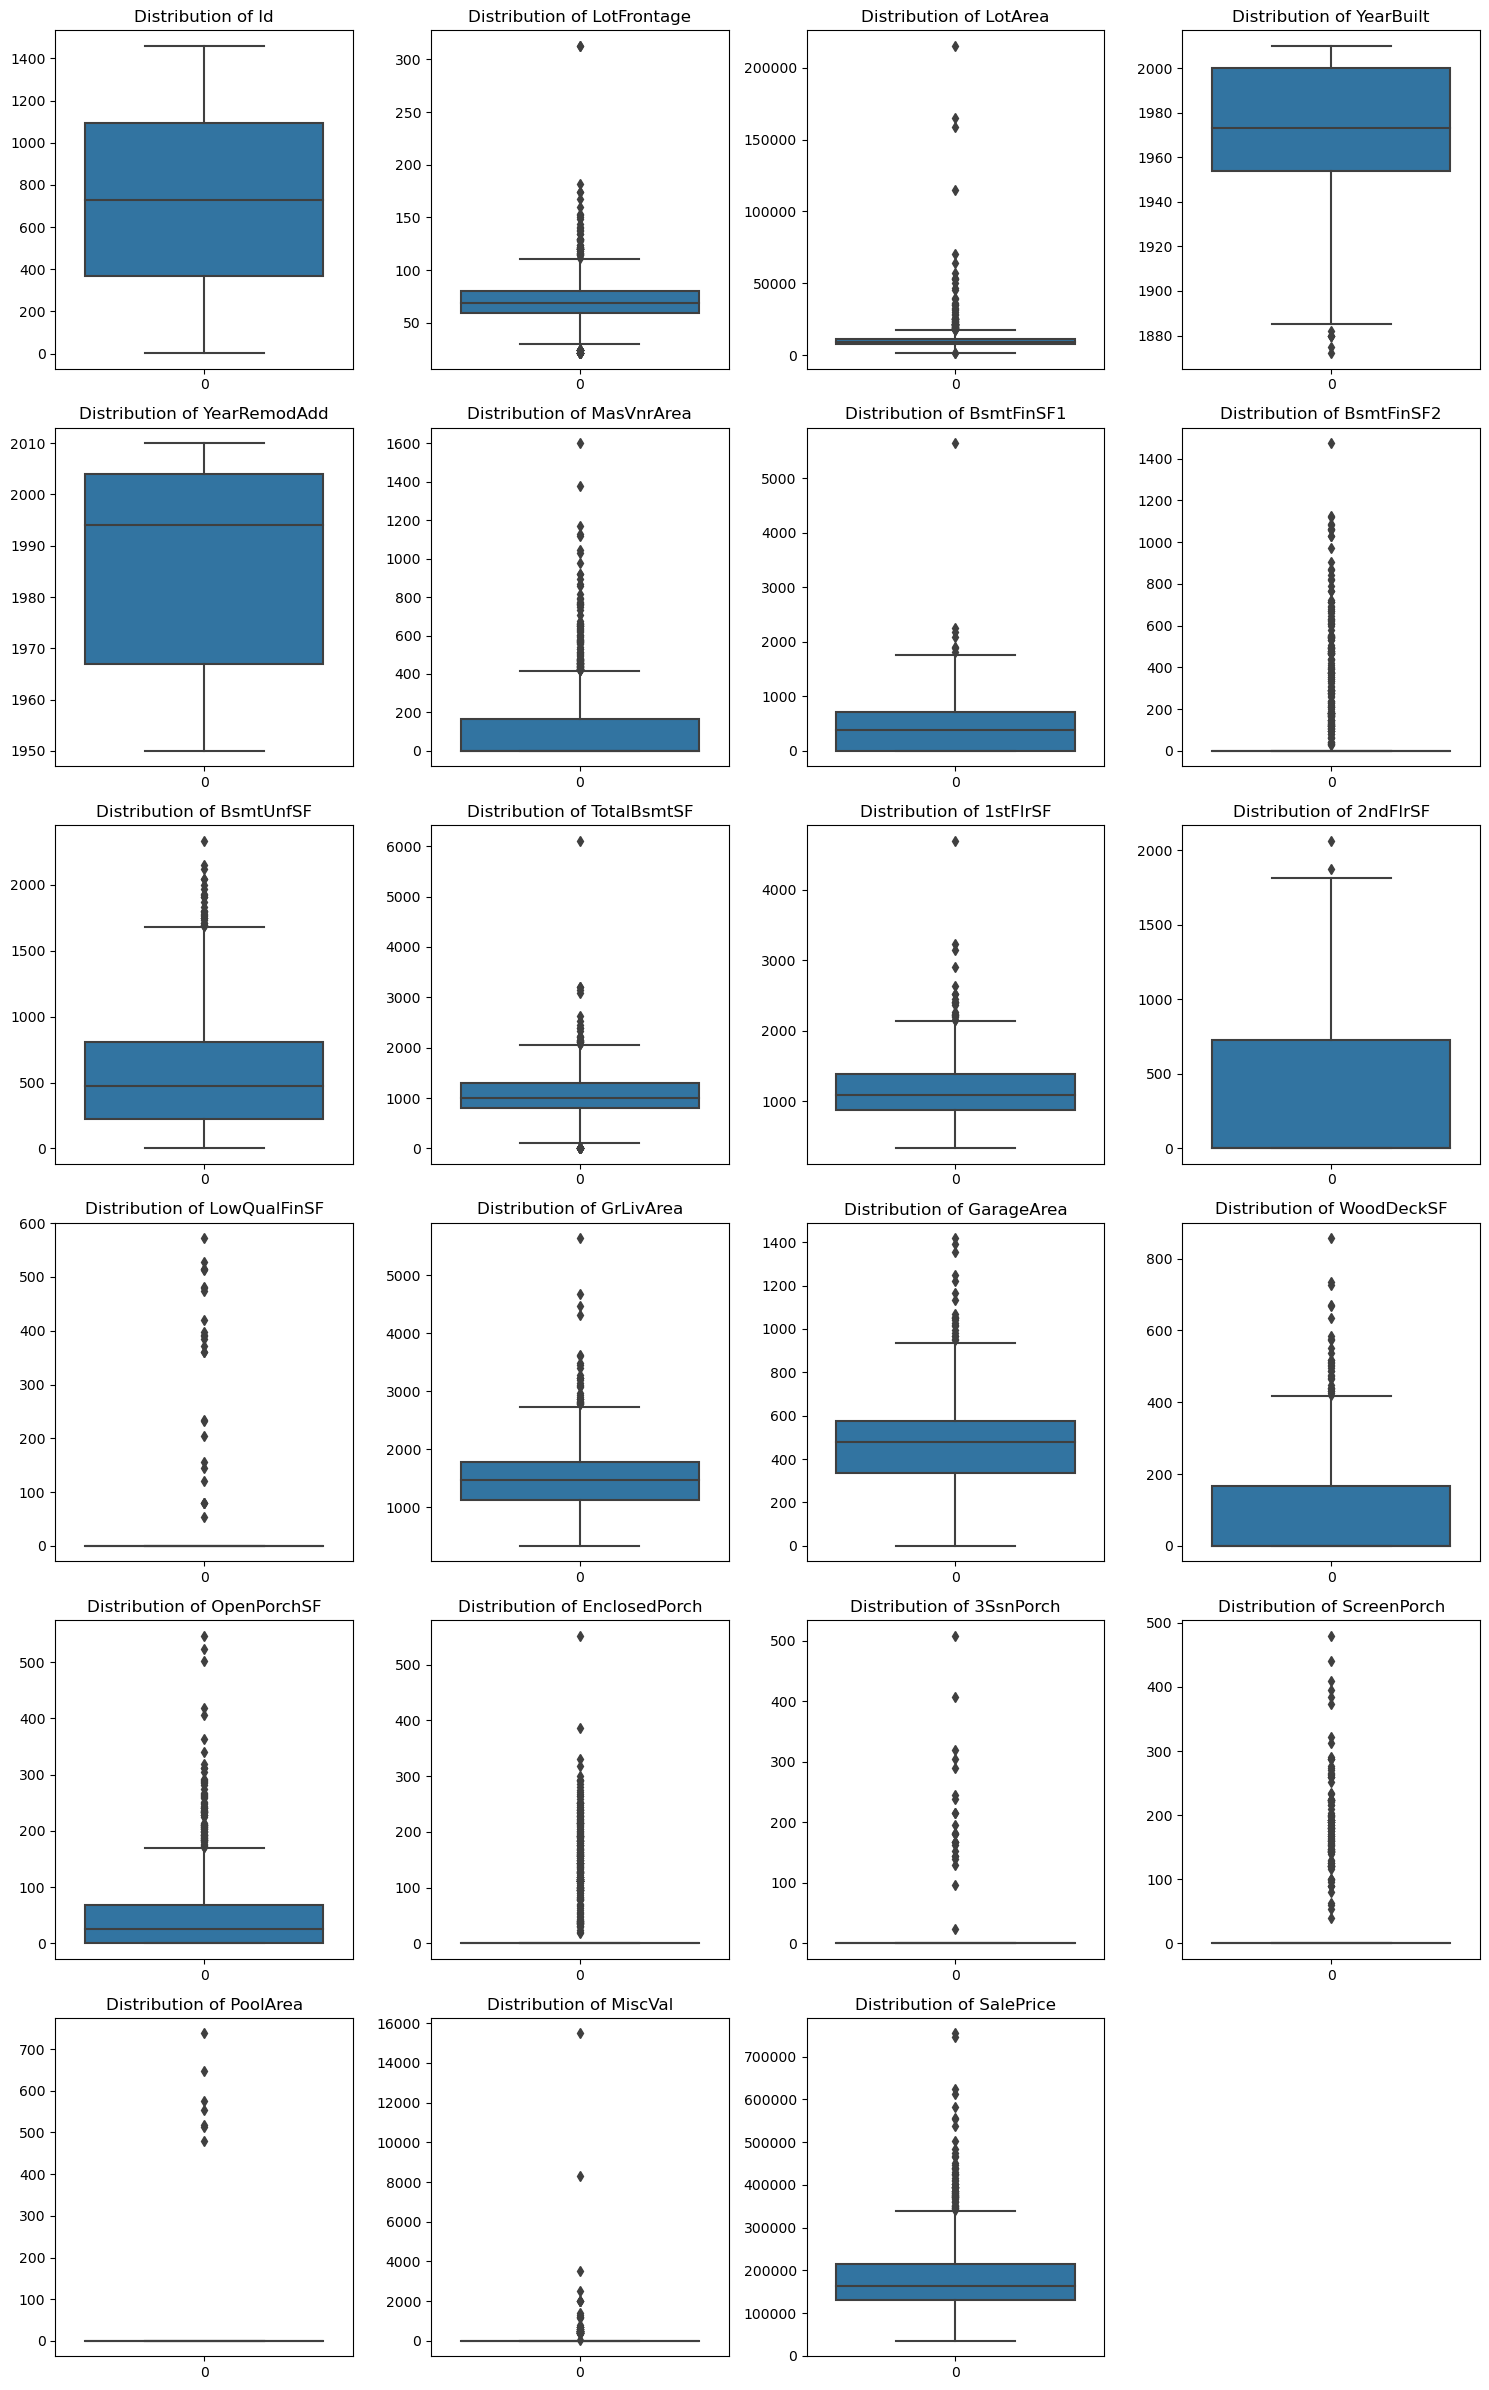

In [16]:


import math
num_plots = len(num_vars)
num_cols = 4  # Fixed number of columns per row

# Calculate the number of required rows based on the number of columns
num_rows_required = math.ceil(num_plots / num_cols)

# Adjust the number of rows dynamically
num_rows = max(num_rows_required, 1)  # Ensure at least one row

# Create a new figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Flatten the 2D array of subplots to iterate over them
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(prices[var], ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
# Remove any empty subplots if there are more subplots than variables
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


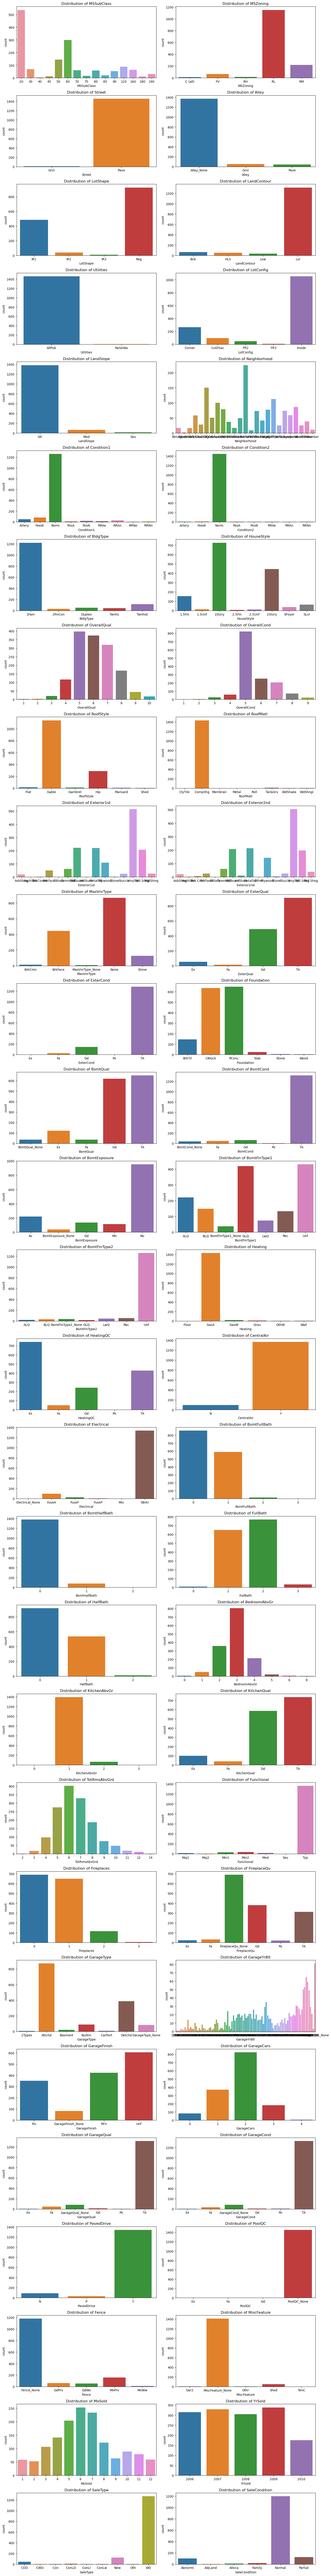

In [17]:
num_plots = len(cat_vars)
num_cols = 2 # Fixed number of columns per row

# Calculate the number of required rows based on the number of columns
num_rows_required = math.ceil(num_plots / num_cols)

# Adjust the number of rows dynamically
num_rows = max(num_rows_required, 1)  # Ensure at least one row

# Create a new figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Flatten the 2D array of subplots to iterate over them
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    if i < num_plots:
        sns.countplot(x=var, data=prices, ax=axes[i])
        axes[i].set_title(f'Distribution of {var}')
    else:
        # If there are more subplots than variables, remove the empty subplots
        fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

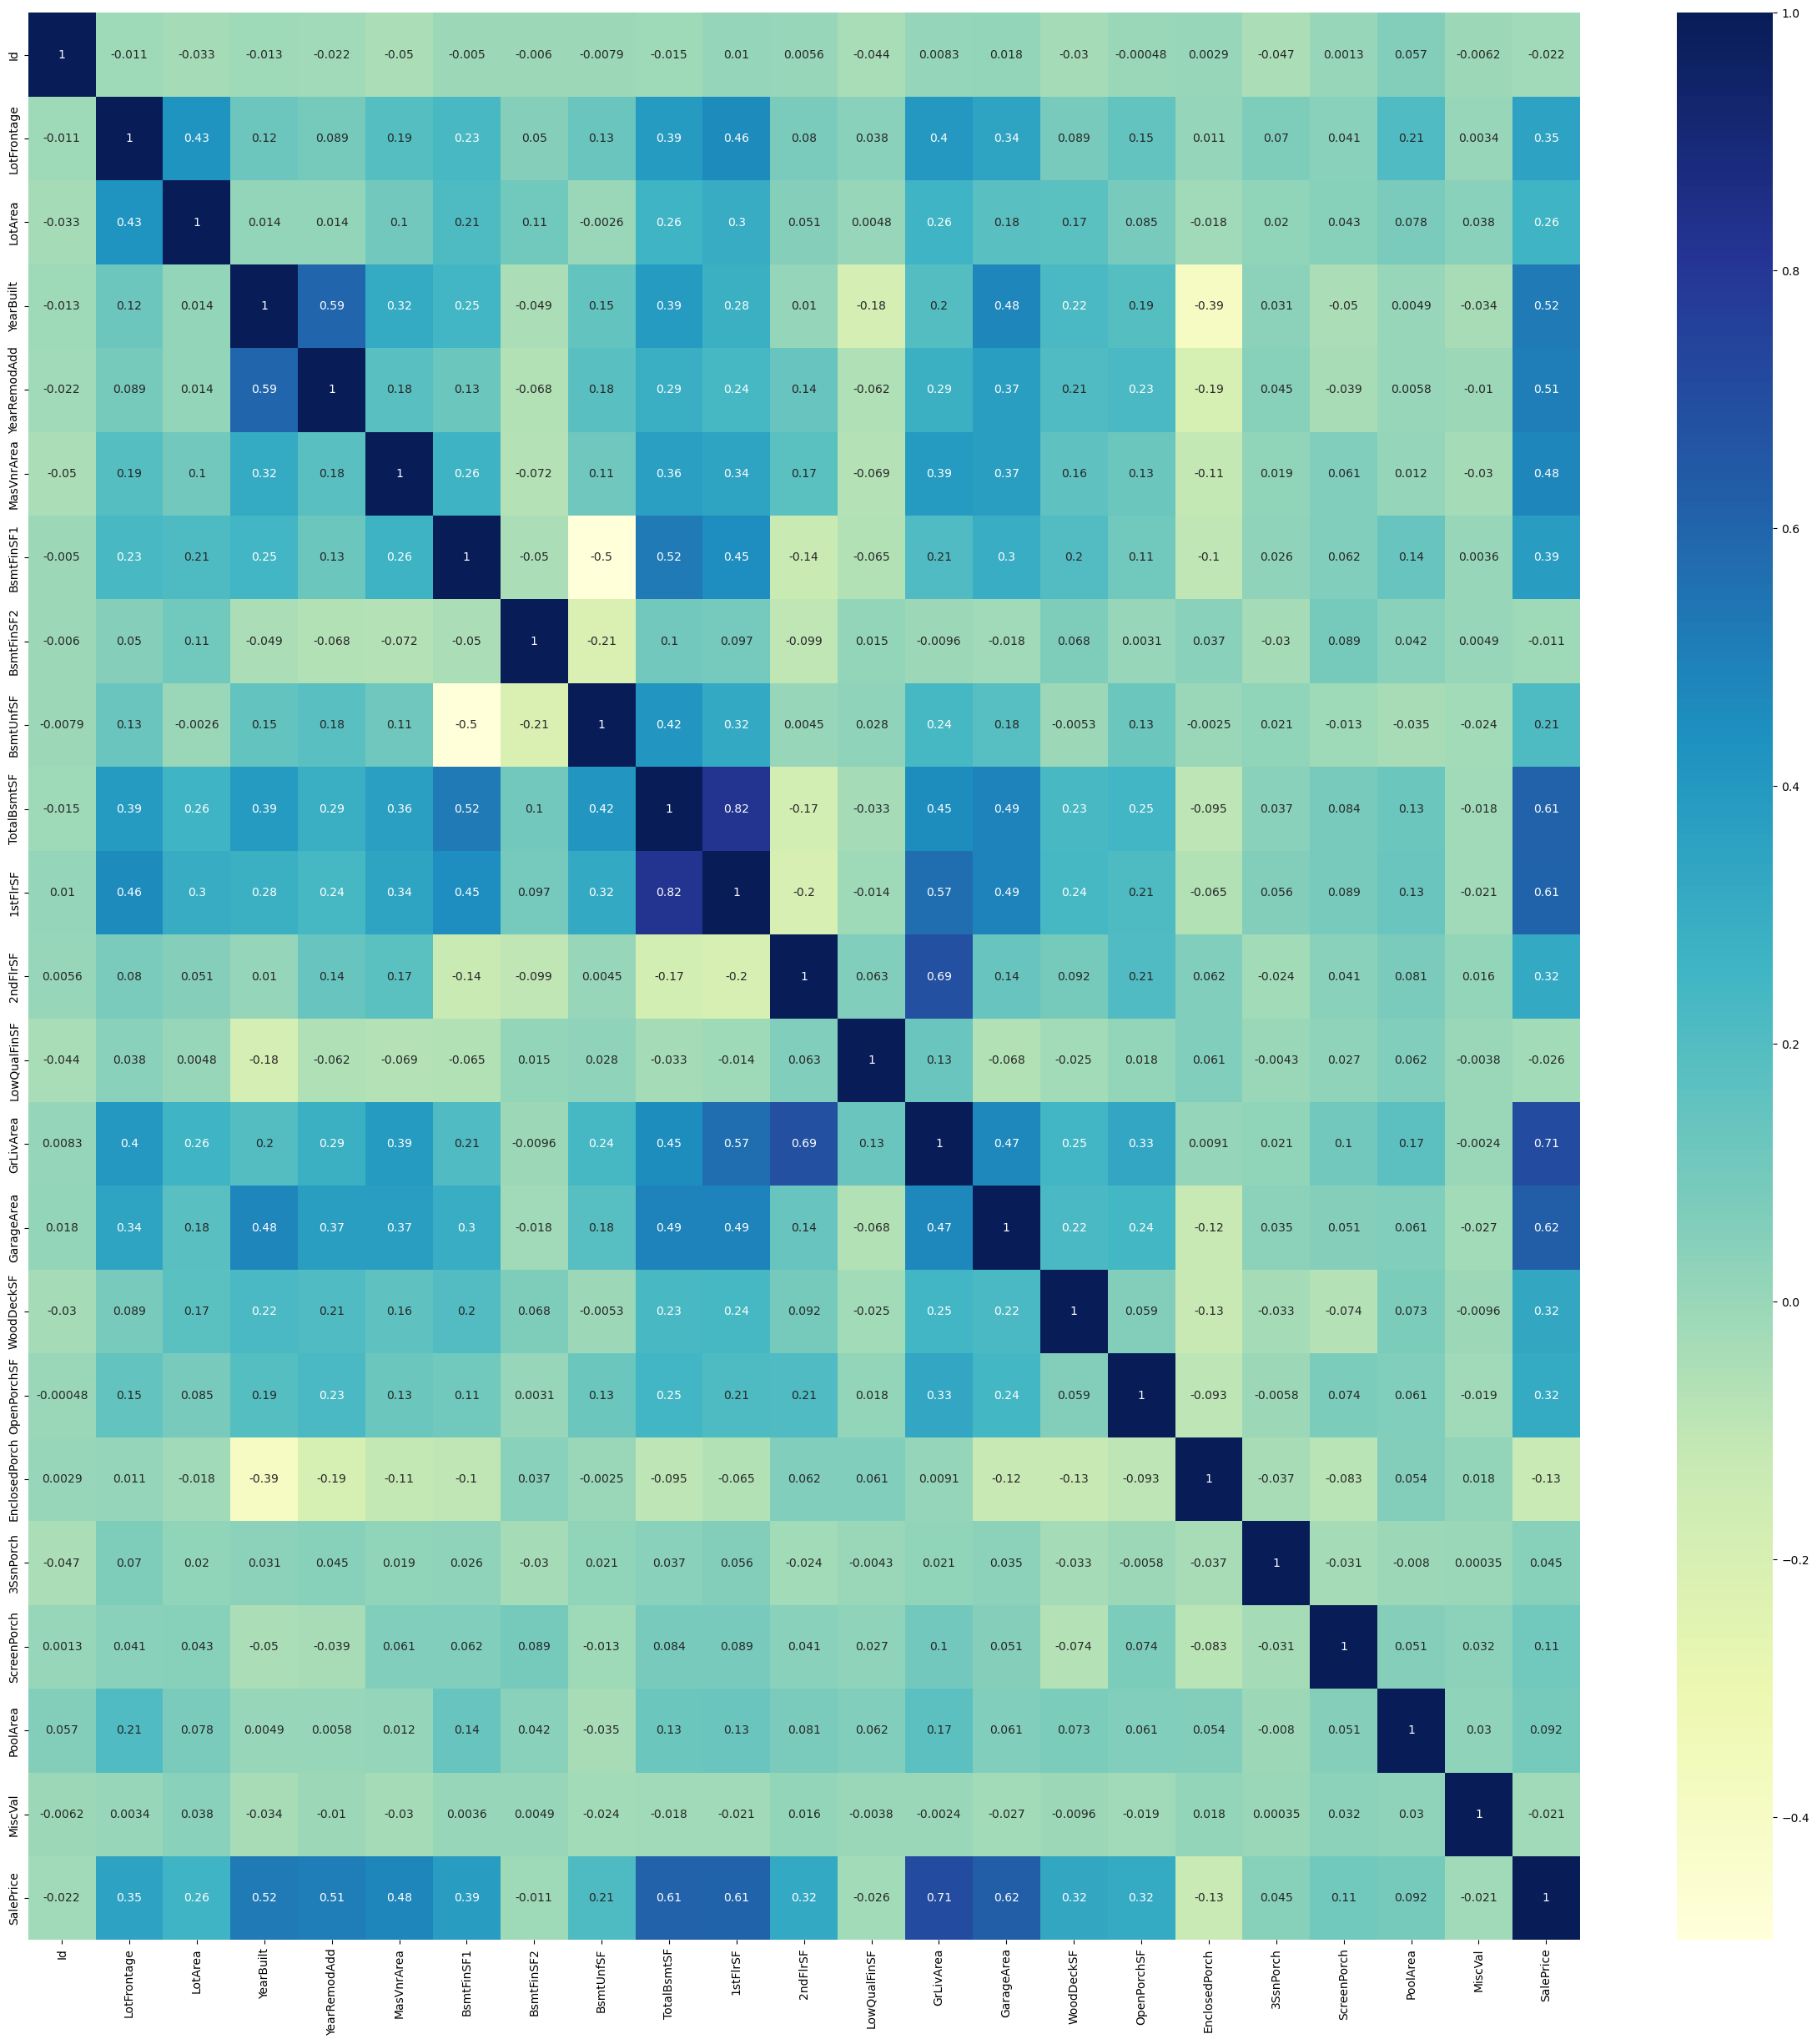

In [18]:
# plotting correlations on a heatmap
# figure size
# correlation matrix
cor = prices.corr()
plt.figure(figsize=(30,30))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


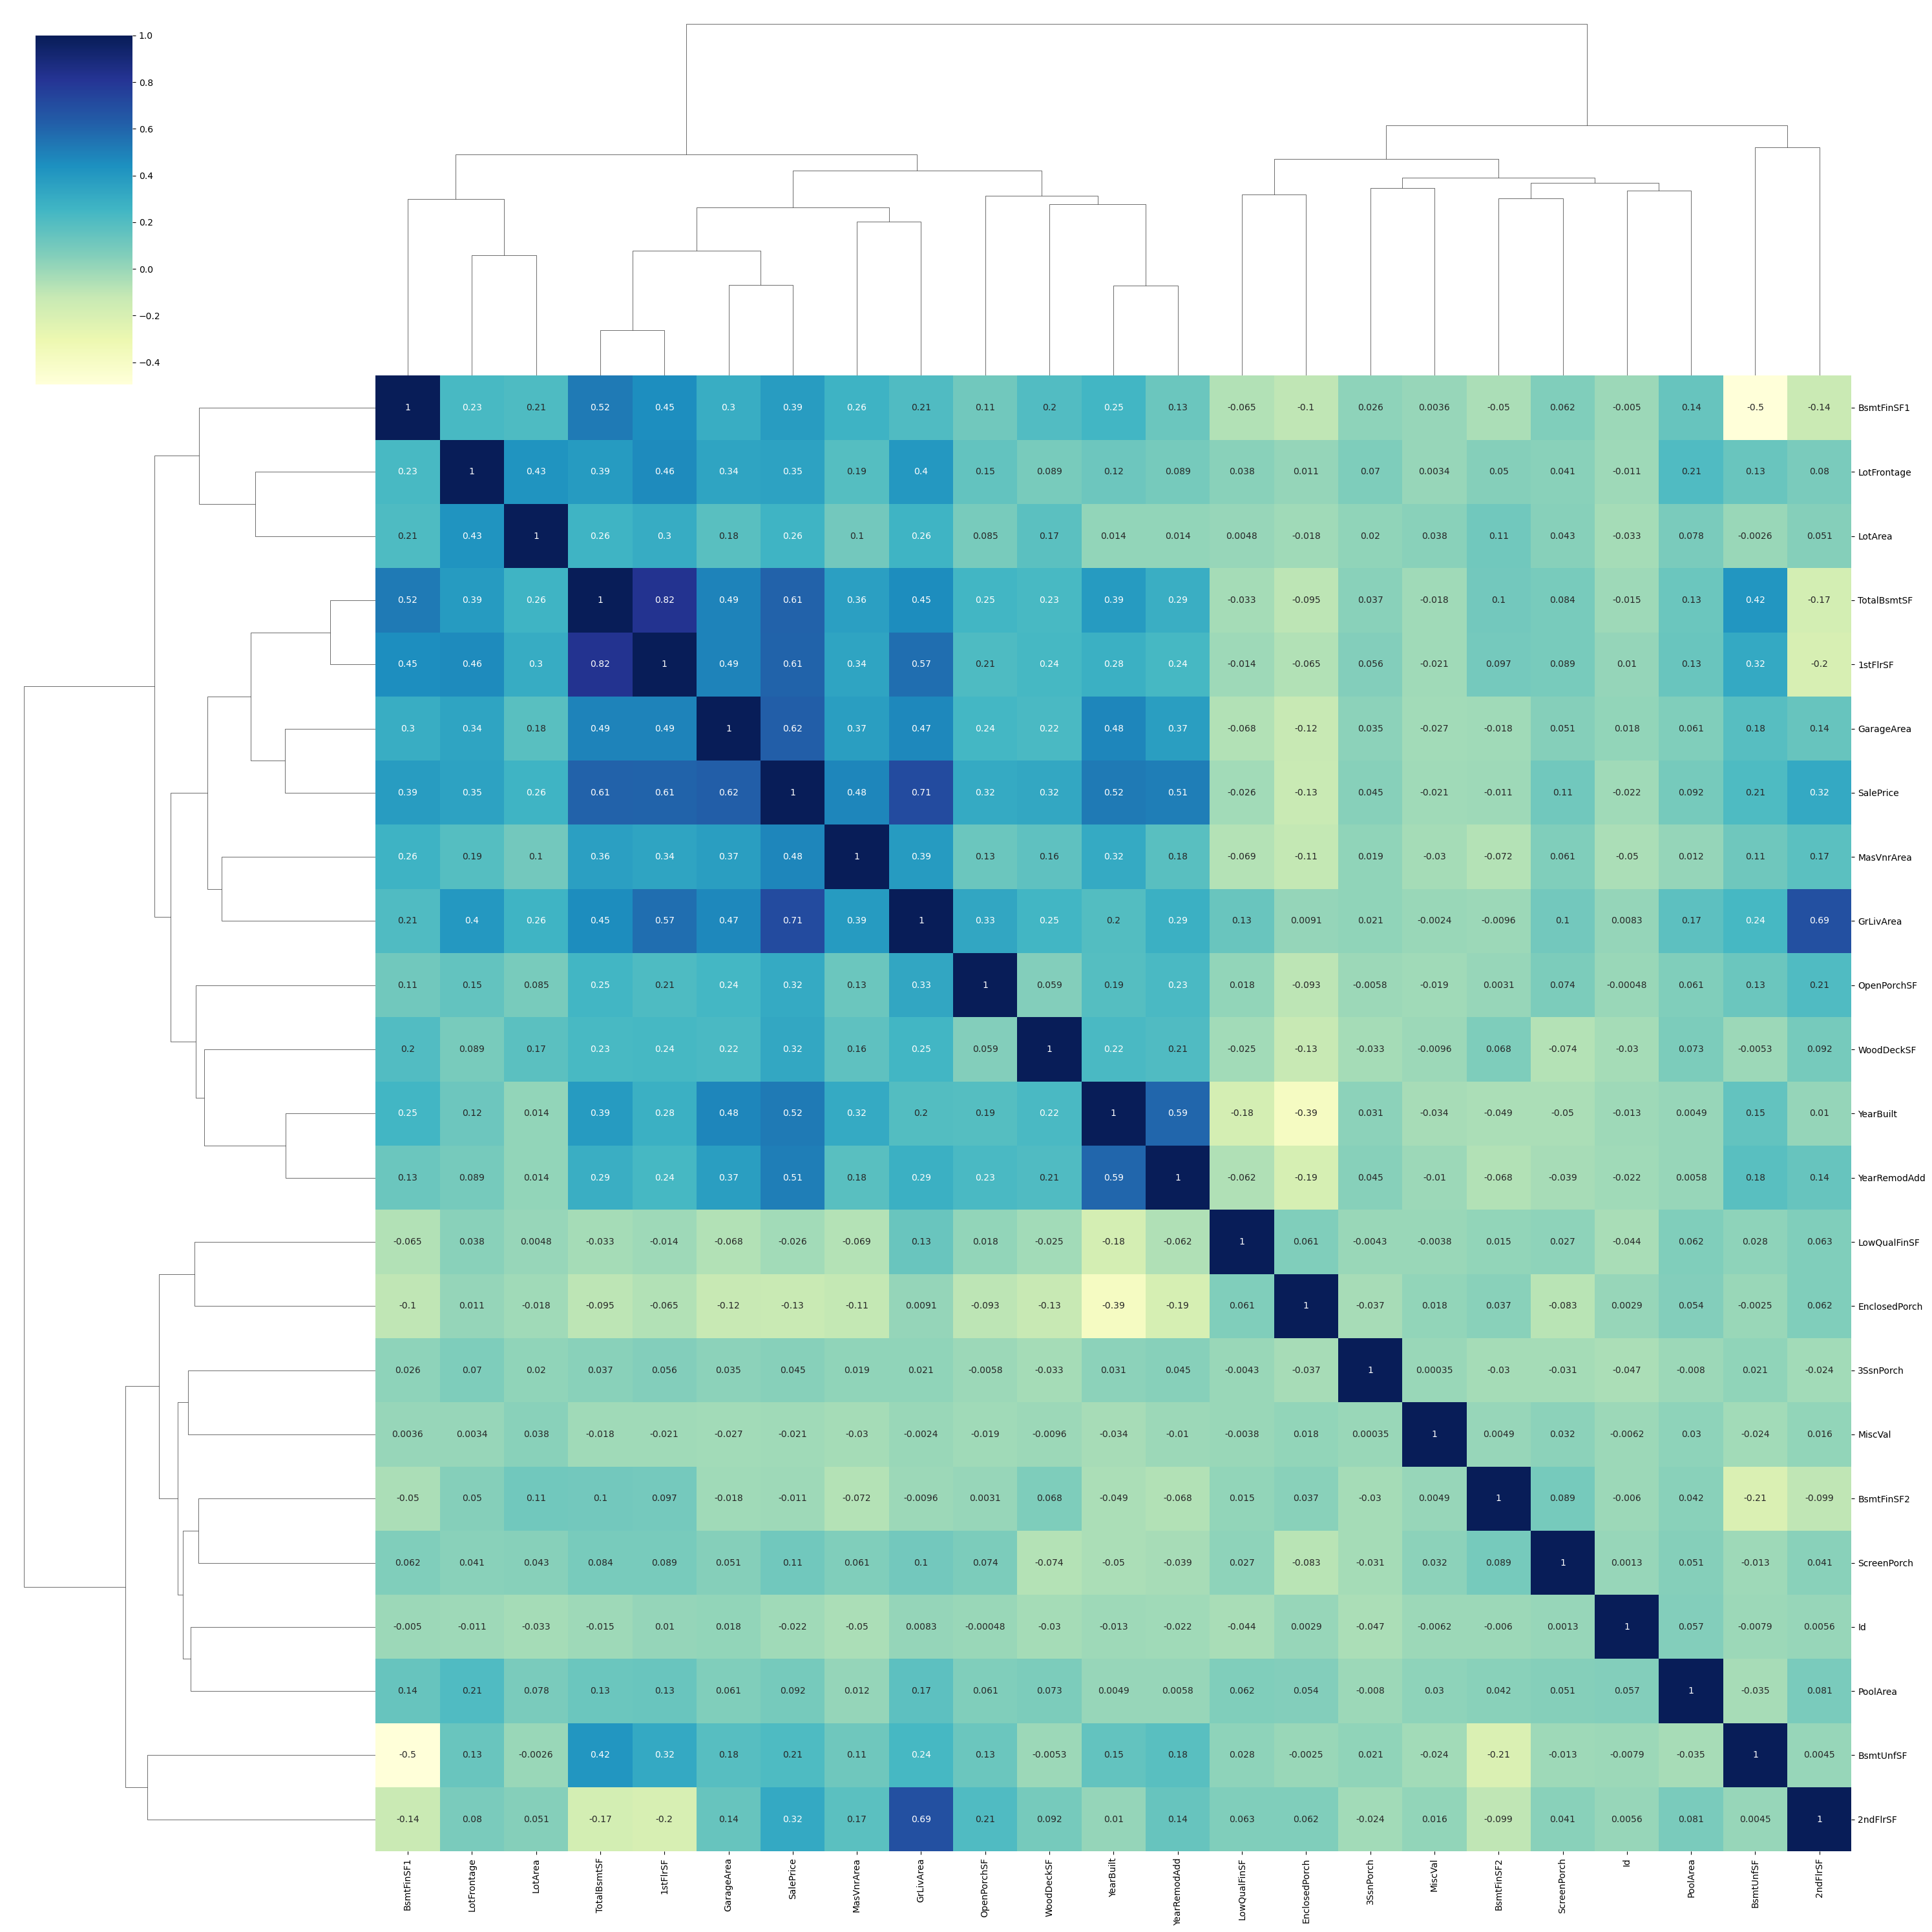

In [19]:
sns.clustermap(cor, cmap="YlGnBu", annot=True, figsize=(30, 30), method='complete')

plt.show()

In [20]:
num_vars

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [21]:
print(prices['LotFrontage'].median(),prices['LotFrontage'].mean())
print(prices['MasVnrArea'].median(),prices['MasVnrArea'].mean())

69.0 70.04995836802665
0.0 103.68526170798899


In [22]:
prices['LotFrontage'].fillna(prices['LotFrontage'].mean(), inplace=True)
prices['MasVnrArea'].fillna(prices['MasVnrArea'].mean(), inplace=True)

In [23]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

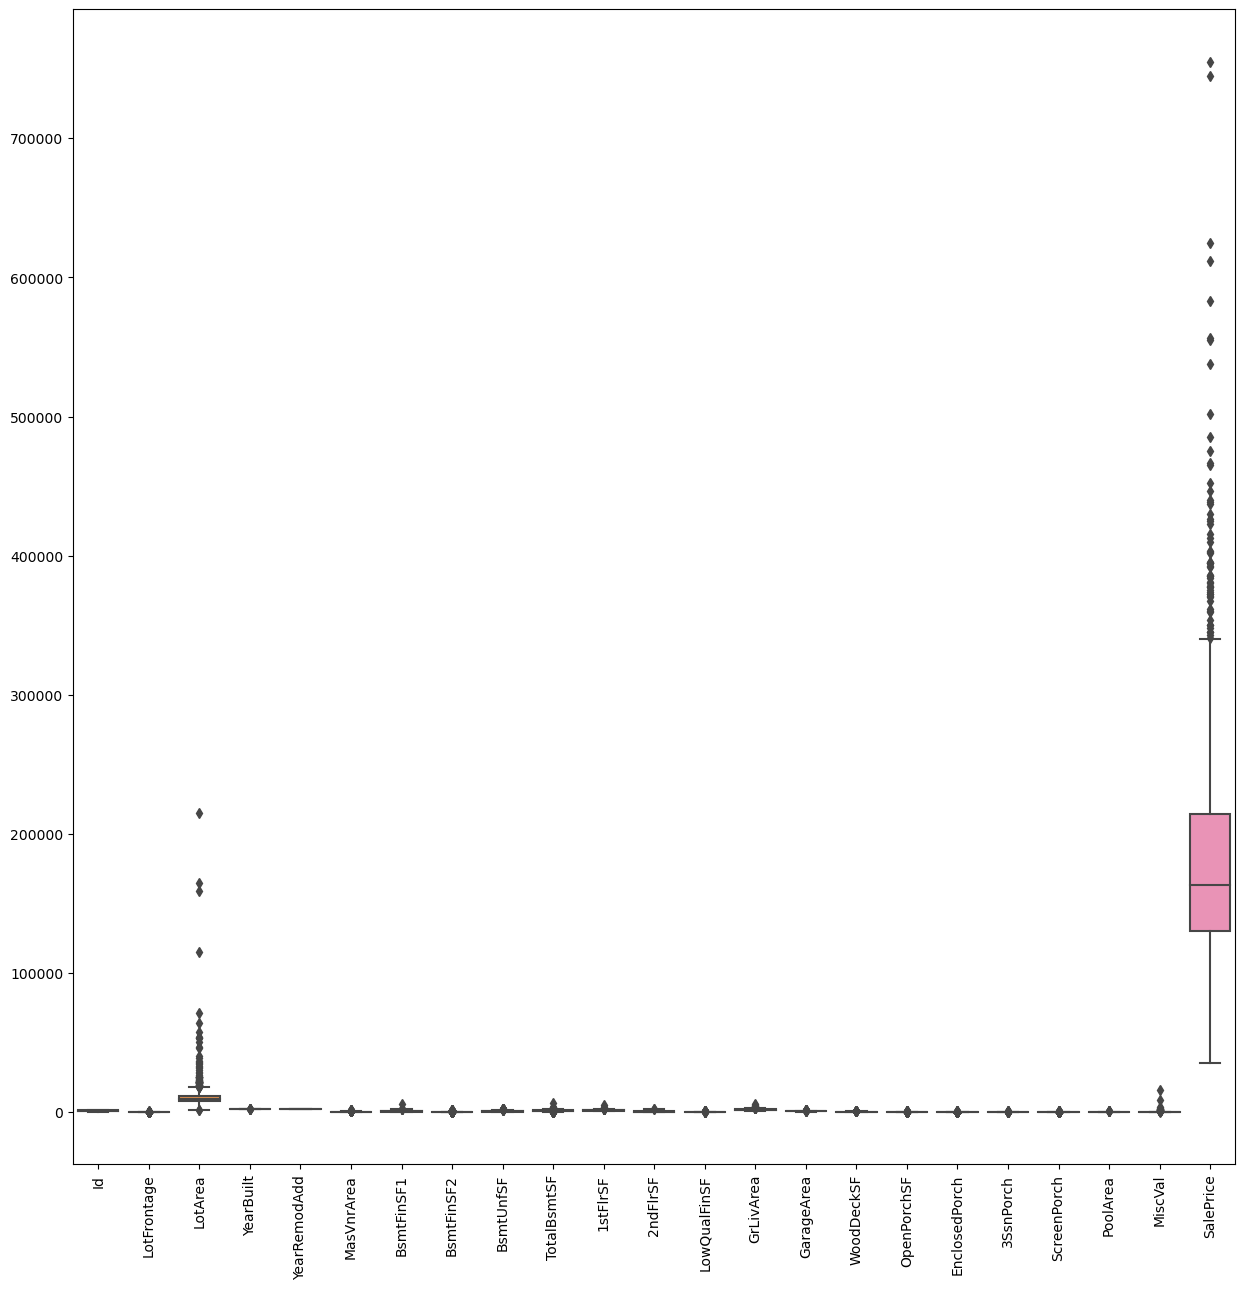

In [24]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=prices[num_vars]);

In [60]:
#The Scale of the SalePrice is very different
## Capping outliers to 5% at lower bound and 95% at upper bound
prices_num_vars = prices[num_vars]
for col in prices_num_vars.columns:
    prices_num_vars[col][prices_num_vars[col] <= prices_num_vars[col].quantile(0.05)] = prices_num_vars[col].quantile(0.05)
    prices_num_vars[col][prices_num_vars[col] >= prices_num_vars[col].quantile(0.95)] = prices_num_vars[col].quantile(0.95)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   float64
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   float64
 10  1stFlrSF       1460 non-null   float64
 11  2ndFlrSF       1460 non-null   float64
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   float64
 14  GarageArea     1460 non-null   float64
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   float64
 17  EnclosedPorch  1460 non-null   float64
 18  3SsnPorc

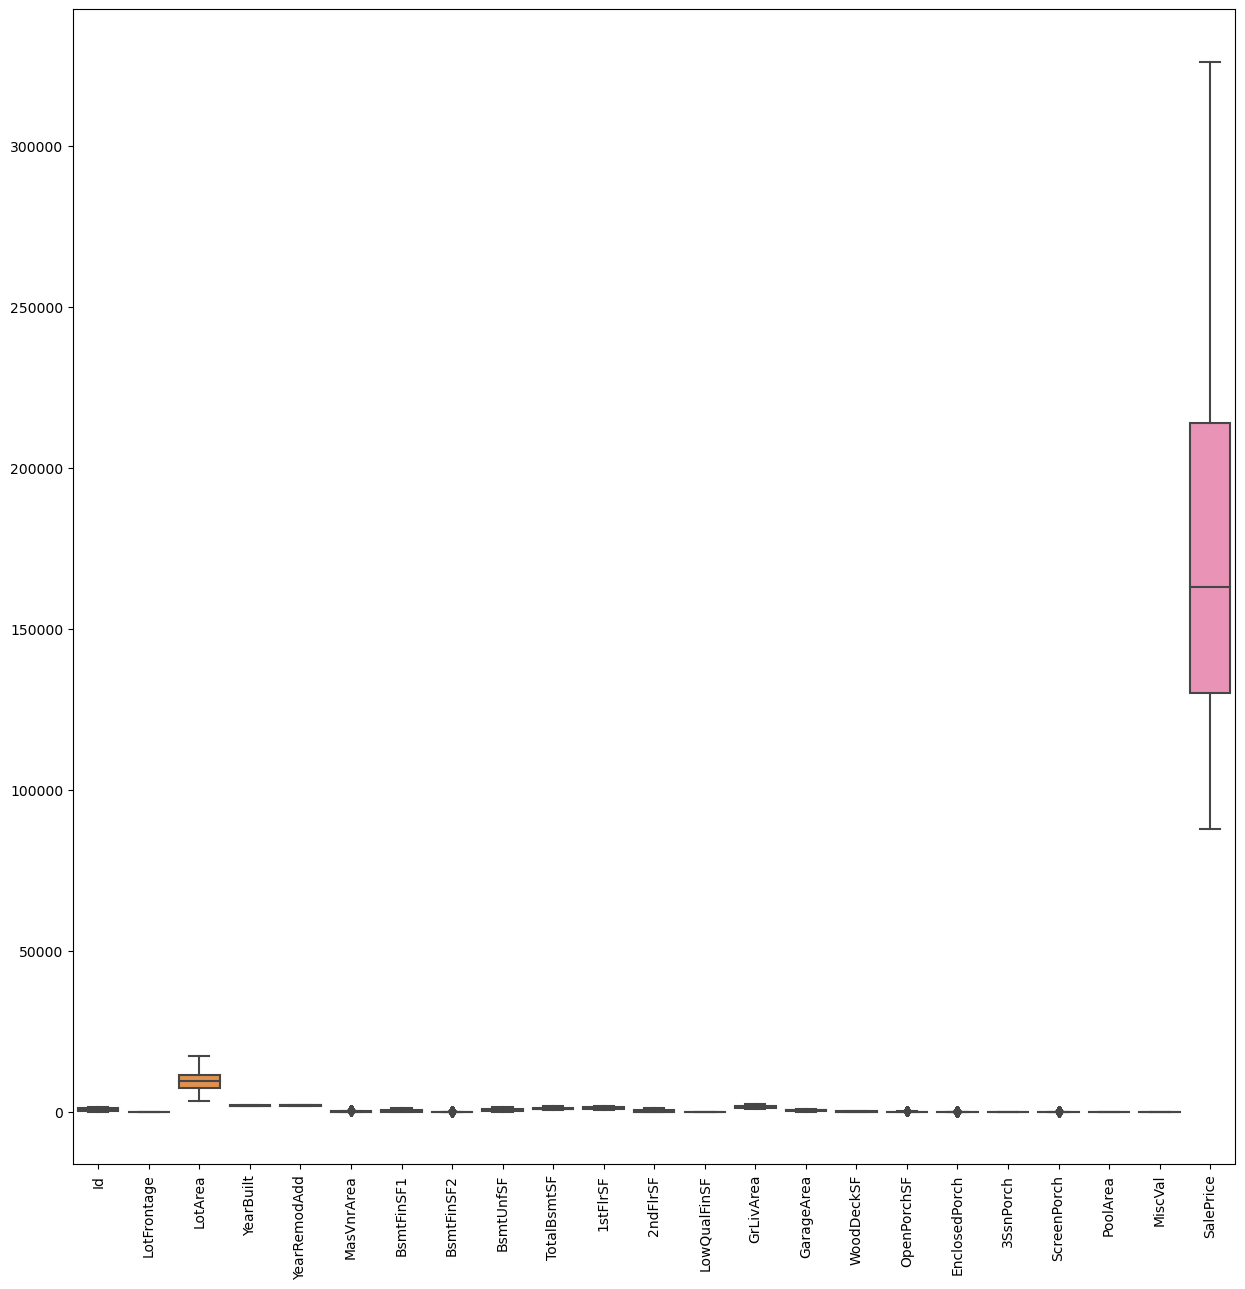

In [61]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=prices_num_vars);

print(prices_num_vars.info())

In [62]:
prices_cat_vars= pd.get_dummies(prices[cat_vars], drop_first=True)
prices_cat_vars.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_MasVnrType_None,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_None,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_None,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_FireplaceQu_None,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Garag

In [28]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
price_df_eda = pd.concat([prices_cat_vars, prices_num_vars], axis=1)
## View the first few rows of our dataframe
price_df_eda.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_MasVnrType_None,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_None,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_None,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_FireplaceQu_None,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Garag

In [63]:
scaler = StandardScaler()
## Scale the numerical columns 
price_df_eda[num_vars] = scaler.fit_transform(price_df_eda[num_vars])

In [64]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = price_df_eda.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_MasVnrType_None,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_None,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_None,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_FireplaceQu_None,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Garag

In [65]:
## Separate out the target variable as y which we want to predict
y = price_df_eda["SalePrice"].copy()
y.head()

0    0.482420
1    0.064079
2    0.714833
3   -0.578928
4    1.125427
Name: SalePrice, dtype: float64

In [66]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [67]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 427)
(1168,)


In [68]:
num_vars.remove('Id')
num_vars.remove('SalePrice')

In [69]:
num_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [56]:
# scaler = StandardScaler()
# ## Scale the numerical columns 
# X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
# X_test[num_vars] = scaler.transform(X_test[num_vars])

AttributeError: 'numpy.ndarray' object has no attribute 'scaler'

In [70]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
        # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [71]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
ridgeCV.best_params_

{'alpha': 10.0}

In [73]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.20225935, 0.15658326, 0.0857708 , 0.10432143, 0.10651574,
        0.10272579, 0.10611544, 0.0957448 , 0.11309772, 0.09773893,
        0.08138418, 0.08437409, 0.07878966, 0.08696785, 0.09454589,
        0.1009304 , 0.10232635, 0.09255304, 0.08118362, 0.10691423,
        0.10591636, 0.08816366, 0.08517184, 0.11329885, 0.11668887,
        0.13005114, 0.11170154, 0.07858982]),
 'std_fit_time': array([0.00438824, 0.06246955, 0.00288977, 0.01627248, 0.02338423,
        0.01062999, 0.03996278, 0.01157803, 0.02612634, 0.03346597,
        0.00495081, 0.00913198, 0.00315407, 0.01780015, 0.02441663,
        0.02731608, 0.02683984, 0.03461402, 0.01485415, 0.03815173,
        0.02899745, 0.02198337, 0.0145972 , 0.01888841, 0.01689017,
        0.0239658 , 0.02780374, 0.0037525 ]),
 'mean_score_time': array([0.02772589, 0.02951884, 0.02114334, 0.02453432, 0.03530521,
        0.03071737, 0.02692819, 0.02553215, 0.02373586, 0.02234015,
        0.02553172, 0.02453508, 0.023935

In [74]:
ridge = Ridge(alpha=10)

In [75]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [76]:
ridge.coef_

array([-2.77260291e-02,  1.31789324e-02,  3.67906413e-02, -3.91323412e-02,
        1.57515259e-03,  3.13255049e-02,  5.59190531e-02, -7.22885842e-03,
       -1.44554820e-02, -6.32465532e-02, -1.96611237e-02, -1.31110274e-01,
        5.02189901e-03, -3.43464330e-02,  1.07733486e-01,  1.97114807e-02,
        3.90702957e-03, -4.38622732e-02,  3.96550603e-02, -4.05746561e-02,
        3.41544636e-03,  2.82941768e-02, -3.54826022e-02, -5.45571968e-03,
        1.37073078e-01,  3.33948902e-02,  4.71141474e-02, -2.33281978e-02,
        8.11712785e-02, -7.54525474e-02, -2.06494212e-02, -7.46510455e-04,
        1.71024220e-02,  1.00985866e-01, -5.48371681e-03,  6.46574654e-02,
        6.21669368e-02,  6.01753078e-02, -4.86268152e-02,  1.88425644e-01,
       -1.45272758e-01, -3.84463583e-02, -8.89042394e-03, -1.29683037e-01,
       -1.20182923e-01, -1.05531056e-01,  5.25216365e-02, -6.93289134e-02,
        9.58689820e-02,  1.36011949e-01, -6.81753422e-02, -4.59433176e-02,
       -5.88923085e-02, -

In [77]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [78]:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 67.78
RSS (Test) = 25.19
MSE (Train) = 0.06
MSE (Test) = 0.09
RMSE (Train) = 0.24
RMSE (Test) = 0.29


In [79]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.202259,0.004388,0.027726,0.004435,0.0001,{'alpha': 0.0001},-0.240401,-0.303562,-0.287248,-0.299502,-0.248323,-0.275807,0.026350,27,-0.137589,-0.124493,-0.133233,-0.133281,-0.140307,-0.133781,0.005365
1,0.156583,0.062470,0.029519,0.005630,0.001,{'alpha': 0.001},-0.240354,-0.300156,-0.282112,-0.298252,-0.245194,-0.273213,0.025678,26,-0.137701,-0.124675,-0.133570,-0.133347,-0.140343,-0.133927,0.005320
2,0.085771,0.002890,0.021143,0.000398,0.01,{'alpha': 0.01},-0.239552,-0.289505,-0.277406,-0.289057,-0.238372,-0.266778,0.023126,25,-0.138931,-0.125775,-0.134044,-0.134034,-0.140739,-0.134705,0.005195
3,0.104321,0.016272,0.024534,0.003432,0.05,{'alpha': 0.05},-0.236792,-0.278702,-0.270192,-0.271611,-0.230947,-0.257649,0.019715,23,-0.141620,-0.129385,-0.134657,-0.136829,-0.141673,-0.136833,0.004616
4,0.106516,0.023384,0.035305,0.022280,0.1,{'alpha': 0.1},-0.233372,-0.272840,-0.265379,-0.262704,-0.226221,-0.252103,0.018651,22,-0.142975,-0.131649,-0.135549,-0.138903,-0.142496,-0.138314,0.004281
5,0.102726,0.010630,0.030717,0.008840,0.2,{'alpha': 0.2},-0.226836,-0.266643,-0.260253,-0.254718,-0.221116,-0.245913,0.018394,21,-0.144421,-0.133979,-0.136877,-0.141156,-0.143896,-0.140066,0.004051
6,0.106115,0.039963,0.026928,0.013529,0.3,{'alpha': 0.3},-0.222042,-0.263358,-0.257006,-0.250072,-0.217101,-0.241916,0.018787,20,-0.145348,-0.135376,-0.137848,-0.142505,-0.145120,-0.141240,0.003986
7,0.095745,0.011578,0.025532,0.004574,0.4,{'alpha': 0.4},-0.218246,-0.261607,-0.254600,-0.246675,-0.214217,-0.239069,0.019278,19,-0.146066,-0.136407,-0.138592,-0.143528,-0.146136,-0.142146,0.003969
8,0.113098,0.026126,0.023736,0.002476,0.5,{'alpha': 0.5},-0.215038,-0.260280,-0.252854,-0.244628,-0.211994,-0.236959,0.019794,18,-0.146651,-0.137267,-0.139193,-0.144331,-0.147065,-0.142902,0.003973
9,0.097739,0.033466,0.022340,0.001018,0.6,{'alpha': 0.6},-0.212492,-0.259200,-0.251536,-0.242984,-0.210171,-0.235277,0.020226,17,-0.147220,-0.138006,-0.139690,-0.145042,-0.147880,-0.143568,0.004002


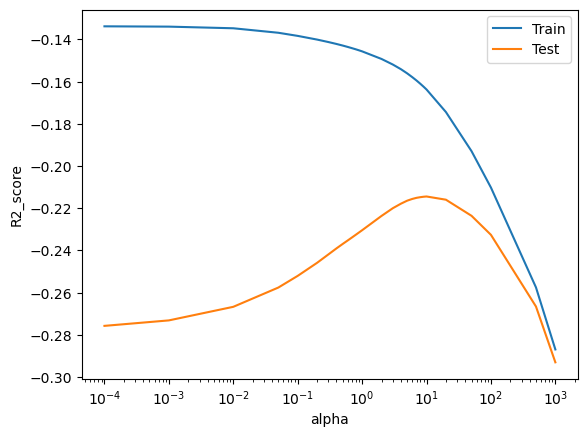

In [80]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()